<a href="https://colab.research.google.com/github/esrayuzgec/parkinsonvsalz/blob/main/resne18PDCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     |████████████████████████████████| 719 kB 5.0 MB/s 
     |████████████████████████████████| 451 kB 72.7 MB/s 
     |████████████████████████████████| 5.8 MB 66.9 MB/s 
     |████████████████████████████████| 1.3 MB 80.9 MB/s 
     |████████████████████████████████| 1.6 MB 59.5 MB/s 
     |████████████████████████████████| 212 kB 77.1 MB/s 
     |████████████████████████████████| 132 kB 77.6 MB/s 
     |████████████████████████████████| 182 kB 82.6 MB/s 
     |████████████████████████████████| 127 kB 38.0 MB/s 
     |████████████████████████████████| 7.6 MB 54.2 MB/s 
Mounted at /content/gdrive


In [2]:
!pip install timm
import timm
from fastbook import *
import timm
from fastai.vision.all import *
from timm import create_model
from fastai.vision.learner import _update_first_layer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 549 kB 4.9 MB/s 


In [3]:
path=Path('/content/gdrive/MyDrive/3_cls')

In [4]:
all_files= get_image_files(path)

In [6]:

from fastai.vision.augment import contrast
tfms = aug_transforms(size=512, 
                      min_scale=0.15,
                      do_flip=False,
                      flip_vert=False,
                      max_rotate=0,
                      max_warp=0,
                    
                      max_zoom=0.25,
                      max_lighting=0.70,
                      p_lighting=0.60
                      
                      )
     
     

In [7]:
dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=RandomSplitter(valid_pct=0.1),
                 get_y=parent_label,
                 item_tfms=Resize(512,method='squish'),
                 batch_tfms=tfms
                 
                 
)

In [8]:
dls= dblock.dataloaders(all_files)


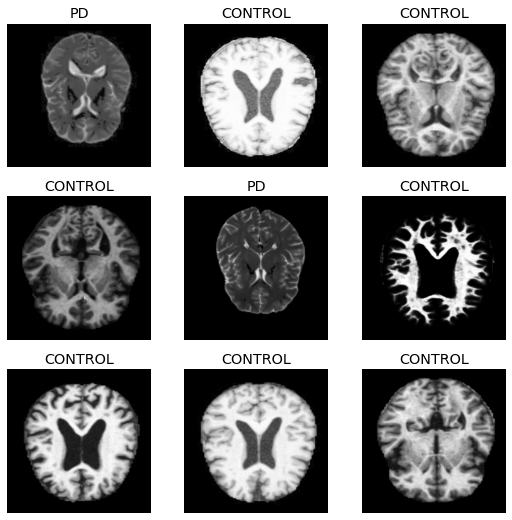

In [9]:
dls.show_batch()


In [10]:
print("Number of examples in testing:", len(dls.valid_ds))


Number of examples in testing: 463


In [11]:
learn = vision_learner(dls, resnet18,metrics=accuracy)


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

SuggestedLRs(valley=0.004365158267319202)

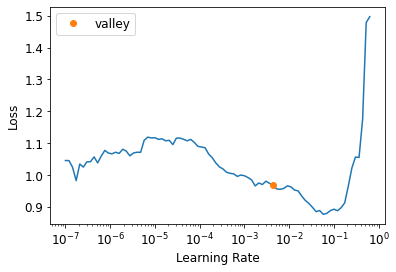

In [12]:
learn.lr_find()


In [13]:
learn.fit_one_cycle(100,0.95e-3)


epoch,train_loss,valid_loss,accuracy,time
0,0.888296,0.612175,0.857451,01:24
1,0.827957,0.600701,0.868251,01:04
2,0.755984,0.605055,0.870410,01:03
3,0.686647,0.654224,0.835853,01:03
4,0.636719,0.601502,0.866091,01:03
5,0.556311,0.475140,0.907127,01:03
6,0.511483,0.430163,0.920086,01:03
7,0.449247,0.367377,0.926566,01:03
8,0.404657,0.278343,0.928726,01:03
9,0.371731,0.377369,0.922246,01:03


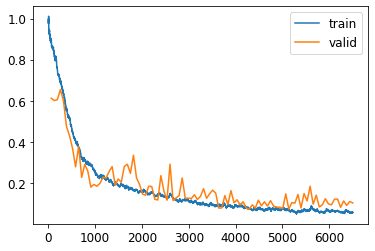

In [14]:
learn.recorder.plot_loss()

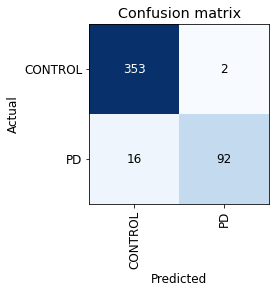

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [19]:
interp.print_classification_report()


              precision    recall  f1-score   support

     CONTROL       0.96      0.99      0.98       355
          PD       0.98      0.85      0.91       108

    accuracy                           0.96       463
   macro avg       0.97      0.92      0.94       463
weighted avg       0.96      0.96      0.96       463



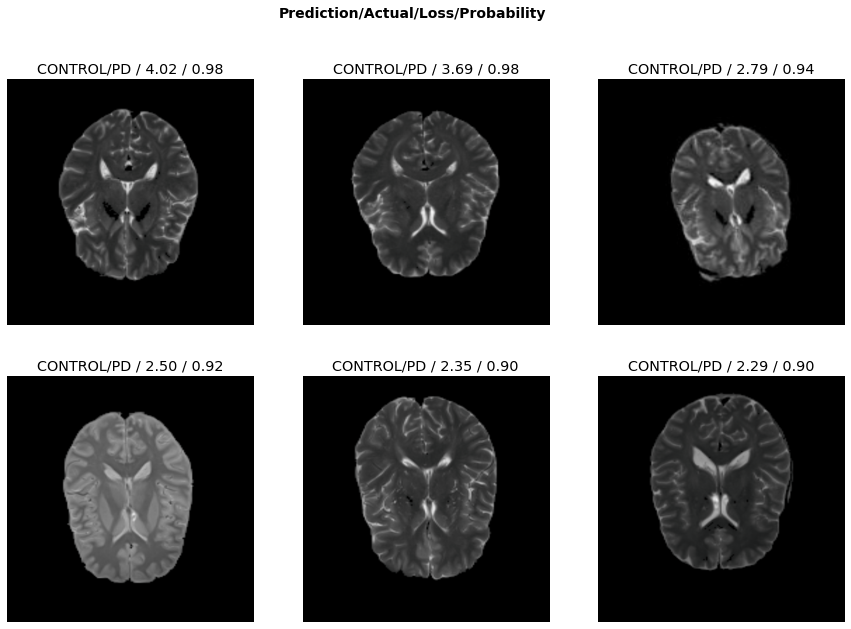

In [20]:
interp.plot_top_losses(6, figsize=(15,10))


In [21]:
learn.save(path/'parkinsonCN_resnet18_1')


Path('/content/gdrive/MyDrive/3_cls/parkinsonCN_resnet18_1.pth')

In [23]:
learn.export(path/'parkinsonCN_resnet18_1.pkl')

In [24]:
all_files= get_image_files(path)
     

In [25]:

dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=GrandparentSplitter(train_name='train', valid_name='test'),
                 get_y=parent_label,
                 item_tfms=Resize(512,method='squish'),
                 batch_tfms=Normalize.from_stats(*imagenet_stats)
                 
                 
)

In [26]:

dls_test = dblock.dataloaders(all_files)

In [27]:
print("Number of examples in testing:", len(dls_test.valid_ds))


Number of examples in testing: 723


In [28]:
learn1 = vision_learner(dls_test, resnet18, metrics=accuracy).load('/content/gdrive/MyDrive/3_cls/parkinsonCN_resnet18_1')


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


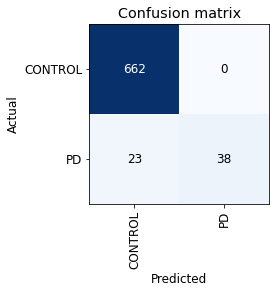

In [29]:
interp= ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

In [30]:
preds, targs = learn1.tta()
accuracy(preds, targs).item()

0.9681881070137024

In [31]:
losses,idxs = interp.top_losses(10)
print(idxs)

TensorBase([ 4, 46,  7, 19,  9, 54, 28, 38, 36,  0])


In [32]:

dls_test.valid_ds.items[4]

Path('/content/gdrive/MyDrive/3_cls/test/PD/PD_310.png')

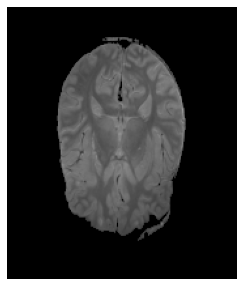

In [33]:

img = PILImage.create('/content/gdrive/MyDrive/3_cls/test/PD/PD_310.png')
img.show()

In [34]:
learn1.predict(img)
     

('CONTROL', TensorBase(0), TensorBase([0.9847, 0.0153]))

In [35]:

class HookActivation():
    def __init__(self, target_layer):
        """Initialize a Pytorch hook using `hook_activation` function."""

        self.hook = target_layer.register_forward_hook(self.hook_activation) 
        
    def hook_activation(self, target_layer, activ_in, activ_out): 
        """Create a copy of the layer output activations and save 
        in `self.stored`.
        """
        self.stored = activ_out.detach().clone()
        
    def __enter__(self, *args): 
        return self
    
    def __exit__(self, *args): 
        self.hook.remove()

        
class HookGradient():
    def __init__(self, target_layer):
        """Initialize a Pytorch hook using `hook_gradient` function."""
        
        self.hook = target_layer.register_backward_hook(self.hook_gradient)   
        
    def hook_gradient(self, target_layer, gradient_in, gradient_out): 
        """Create a copy of the layer output gradients and save 
        in `self.stored`.
        """
        self.stored = gradient_out[0].detach().clone()
        
    def __enter__(self, *args): 
        return self

    def __exit__(self, *args): 
        self.hook.remove()

In [36]:
m = learn1.model.eval();
m;

In [37]:
target_layer = learn1.model[0]

target_layer;

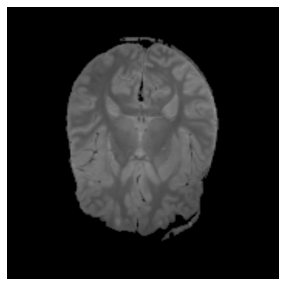

In [38]:
x, = first(dls_test.test_dl([img]))

x_img = TensorImage(dls_test.train.decode((x,))[0][0])
x_img.show()

In [39]:

class_Z = 1

with HookGradient(target_layer) as hookg:
    with HookActivation(target_layer) as hook:
        output = learn1.model.eval()(x.cuda())
        act = hook.stored
    output[0, class_Z].backward()
    grad = hookg.stored
    p0, p1 = output.cpu().detach()[0]
     

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1113: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


In [40]:

w = grad[0].mean(dim=(1,2), keepdim=True)
gradcam_map = (w * act[0]).sum(0).detach().cpu()

In [41]:
def plot_gradcam(img, learn1, hooked_layer, size=512):
    
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(8.5, 3), dpi=150)

    x_img = TensorImage(dls_test.train.decode((x,))[0][0])
    
    
    for i, ax in zip([0, 2, 1], axes):

        if i == 0:
            x_img.show(ax=ax)
            ax.set_axis_off()
            continue

        with HookGradient(hooked_layer) as hookg:
            with HookActivation(hooked_layer) as hook:
                output = learn1.model.eval()(x.cuda())
                act = hook.stored
            output[0, i-1].backward()
            grad = hookg.stored
            p_high, p_low = output.cpu().detach()[0]

        w = grad[0].mean(dim=(1,2), keepdim=True)
        gradcam_map = (w * act[0]).sum(0).detach().cpu()

        # thresholding to account for ReLU
        gradcam_map = torch.clamp(gradcam_map, min=0) 

        x_img.show(ax=ax)
        ax.imshow(
            gradcam_map, alpha=0.6, extent=(0, size, size,0),
            interpolation='mitchell', cmap='hot'
        )
        ax.set_axis_off()
            
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.02)
     
    return (fig, axes, *(np.exp([p_low, p_high]) / np.exp([p_low, p_high]).sum()))

(<Figure size 1275x450 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f48e05bd2b0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f48e04d06a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f48ebbec430>], dtype=object),
 0.0153040225,
 0.984696)

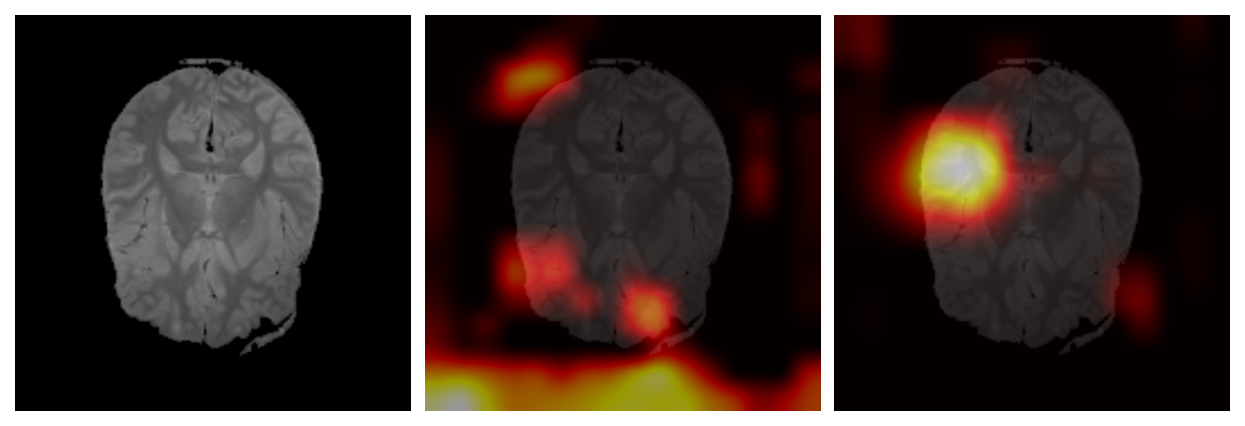

In [42]:
plot_gradcam(x_img,learn1,target_layer)


In [47]:

dls_test.valid_ds.items[106]

Path('/content/gdrive/MyDrive/3_cls/test/CONTROL/CONTROLAD_2632.png')

In [59]:
img2=PILImage.create('/content/gdrive/MyDrive/3_cls/test/CONTROL/CONTROLAD_2632.png')
learn1.predict(img2)

('CONTROL', TensorBase(0), TensorBase([0.9978, 0.0022]))

In [60]:

class HookActivation():
    def __init__(self, target_layer):
        """Initialize a Pytorch hook using `hook_activation` function."""

        self.hook = target_layer.register_forward_hook(self.hook_activation) 
        
    def hook_activation(self, target_layer, activ_in, activ_out): 
        """Create a copy of the layer output activations and save 
        in `self.stored`.
        """
        self.stored = activ_out.detach().clone()
        
    def __enter__(self, *args): 
        return self
    
    def __exit__(self, *args): 
        self.hook.remove()

        
class HookGradient():
    def __init__(self, target_layer):
        """Initialize a Pytorch hook using `hook_gradient` function."""
        
        self.hook = target_layer.register_backward_hook(self.hook_gradient)   
        
    def hook_gradient(self, target_layer, gradient_in, gradient_out): 
        """Create a copy of the layer output gradients and save 
        in `self.stored`.
        """
        self.stored = gradient_out[0].detach().clone()
        
    def __enter__(self, *args): 
        return self

    def __exit__(self, *args): 
        self.hook.remove()

In [61]:

m = learn1.model.eval();
m;
     

In [62]:

target_layer = learn1.model[0]

target_layer;

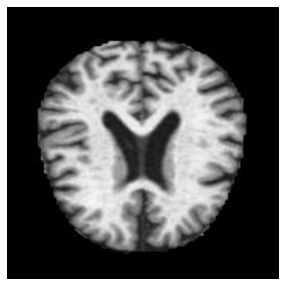

In [64]:

x, = first(dls_test.test_dl([img2]))

x_img = TensorImage(dls_test.train.decode((x,))[0][0])
x_img.show()

In [65]:
class_Z = 1

with HookGradient(target_layer) as hookg:
    with HookActivation(target_layer) as hook:
        output = learn1.model.eval()(x.cuda())
        act = hook.stored
    output[0, class_Z].backward()
    grad = hookg.stored
    p0, p1 = output.cpu().detach()[0]

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1113: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


In [66]:
w = grad[0].mean(dim=(1,2), keepdim=True)
gradcam_map = (w * act[0]).sum(0).detach().cpu()
     

In [67]:
def plot_gradcam(img, learn1, hooked_layer, size=512):
    
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(8.5, 3), dpi=150)

    x_img = TensorImage(dls_test.train.decode((x,))[0][0])
    
    
    for i, ax in zip([0, 2, 1], axes):

        if i == 0:
            x_img.show(ax=ax)
            ax.set_axis_off()
            continue

        with HookGradient(hooked_layer) as hookg:
            with HookActivation(hooked_layer) as hook:
                output = learn1.model.eval()(x.cuda())
                act = hook.stored
            output[0, i-1].backward()
            grad = hookg.stored
            p_high, p_low = output.cpu().detach()[0]

        w = grad[0].mean(dim=(1,2), keepdim=True)
        gradcam_map = (w * act[0]).sum(0).detach().cpu()

        # thresholding to account for ReLU
        gradcam_map = torch.clamp(gradcam_map, min=0) 

        x_img.show(ax=ax)
        ax.imshow(
            gradcam_map, alpha=0.6, extent=(0, size, size,0),
            interpolation='mitchell', cmap='hot'
        )
        ax.set_axis_off()
            
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.02)
    
    return (fig, axes, *(np.exp([p_low, p_high]) / np.exp([p_low, p_high]).sum()))

(<Figure size 1275x450 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f484e5897c0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f484e5b0a00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f484e559040>], dtype=object),
 0.0022053276,
 0.9977947)

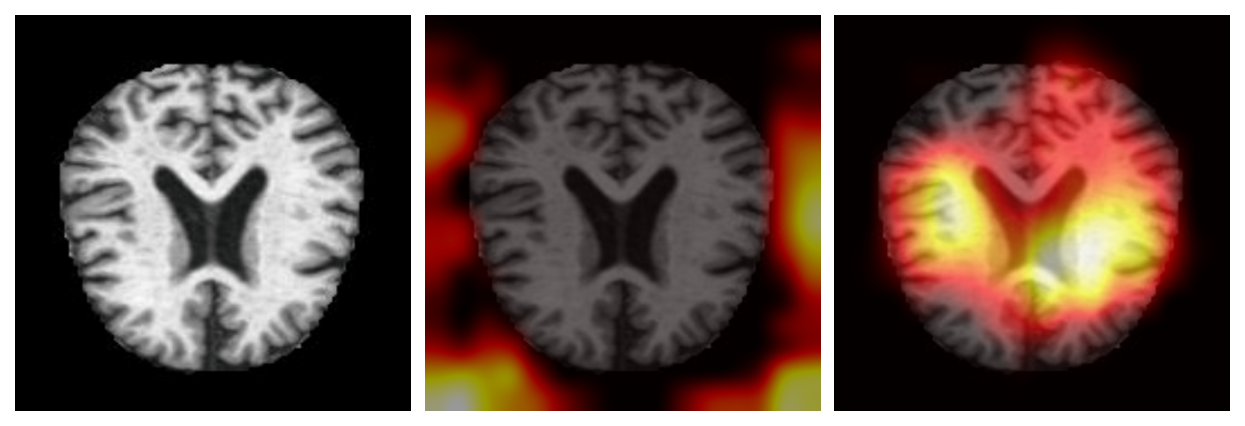

In [68]:
plot_gradcam(x_img,learn1,target_layer)

In [69]:
dls_test.valid_ds.items[110]


Path('/content/gdrive/MyDrive/3_cls/test/CONTROL/CONTROLAD_2643.png')

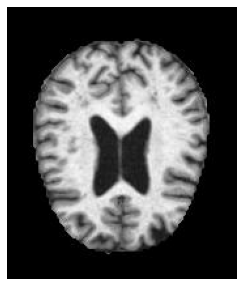

In [70]:
img = PILImage.create('/content/gdrive/MyDrive/3_cls/test/CONTROL/CONTROLAD_2643.png')
img.show()
     

In [71]:

learn1.predict(img)
     

('CONTROL', TensorBase(0), TensorBase([0.9836, 0.0164]))

In [72]:
class HookActivation():
    def __init__(self, target_layer):
        """Initialize a Pytorch hook using `hook_activation` function."""

        self.hook = target_layer.register_forward_hook(self.hook_activation) 
        
    def hook_activation(self, target_layer, activ_in, activ_out): 
        """Create a copy of the layer output activations and save 
        in `self.stored`.
        """
        self.stored = activ_out.detach().clone()
        
    def __enter__(self, *args): 
        return self
    
    def __exit__(self, *args): 
        self.hook.remove()

        
class HookGradient():
    def __init__(self, target_layer):
        """Initialize a Pytorch hook using `hook_gradient` function."""
        
        self.hook = target_layer.register_backward_hook(self.hook_gradient)   
        
    def hook_gradient(self, target_layer, gradient_in, gradient_out): 
        """Create a copy of the layer output gradients and save 
        in `self.stored`.
        """
        self.stored = gradient_out[0].detach().clone()
        
    def __enter__(self, *args): 
        return self

    def __exit__(self, *args): 
        self.hook.remove()
     

In [73]:

m = learn1.model.eval();
m;
     

In [75]:

target_layer = learn1.model[0][7]

target_layer;
     

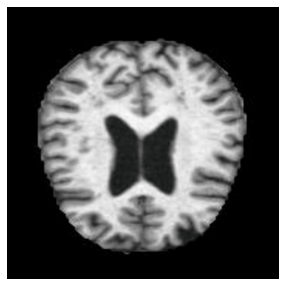

In [76]:
x, = first(dls_test.test_dl([img]))

x_img = TensorImage(dls_test.train.decode((x,))[0][0])
x_img.show()
     

In [77]:

class_Z = 1

with HookGradient(target_layer) as hookg:
    with HookActivation(target_layer) as hook:
        output = learn1.model.eval()(x.cuda())
        act = hook.stored
    output[0, class_Z].backward()
    grad = hookg.stored
    p0, p1 = output.cpu().detach()[0]
     

In [78]:

w = grad[0].mean(dim=(1,2), keepdim=True)
gradcam_map = (w * act[0]).sum(0).detach().cpu()

In [79]:

def plot_gradcam(img, learn1, hooked_layer, size=512):
    
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(8.5, 3), dpi=150)

    x_img = TensorImage(dls_test.train.decode((x,))[0][0])
    
    
    for i, ax in zip([0, 2, 1], axes):

        if i == 0:
            x_img.show(ax=ax)
            ax.set_axis_off()
            continue

        with HookGradient(hooked_layer) as hookg:
            with HookActivation(hooked_layer) as hook:
                output = learn1.model.eval()(x.cuda())
                act = hook.stored
            output[0, i-1].backward()
            grad = hookg.stored
            p_high, p_low = output.cpu().detach()[0]

        w = grad[0].mean(dim=(1,2), keepdim=True)
        gradcam_map = (w * act[0]).sum(0).detach().cpu()

        # thresholding to account for ReLU
        gradcam_map = torch.clamp(gradcam_map, min=0) 

        x_img.show(ax=ax)
        ax.imshow(
            gradcam_map, alpha=0.6, extent=(0, size, size,0),
            interpolation='mitchell', cmap='hot'
        )
        ax.set_axis_off()
            
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.02)
    
    return (fig, axes, *(np.exp([p_low, p_high]) / np.exp([p_low, p_high]).sum()))
     

(<Figure size 1275x450 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f484e444760>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f484e46e280>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f484e4107c0>], dtype=object),
 0.016401703,
 0.9835983)

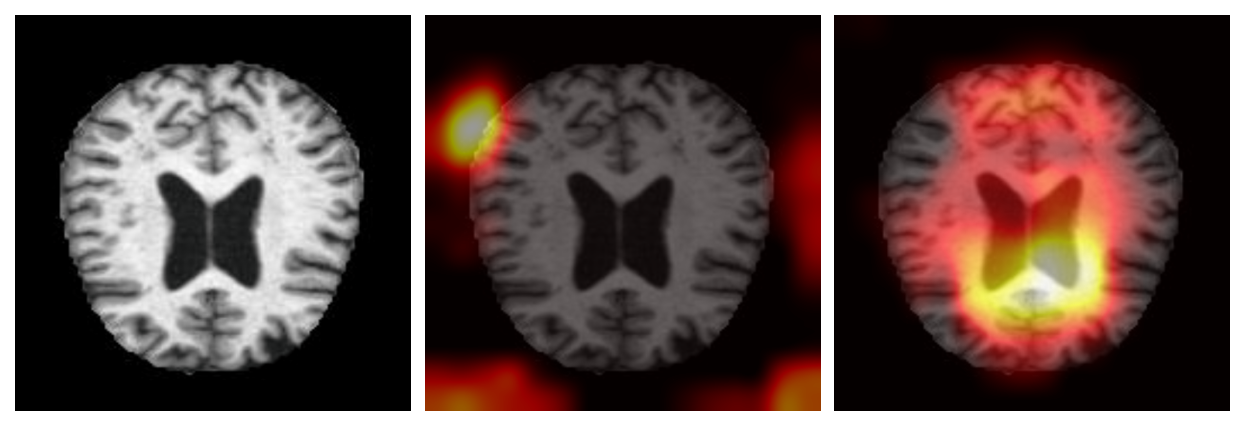

In [80]:

plot_gradcam(x_img,learn1,target_layer)


In [82]:
dls_test.valid_ds.items[11]


Path('/content/gdrive/MyDrive/3_cls/test/PD/PD_341.png')

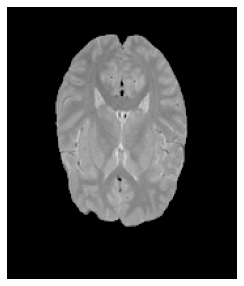

In [84]:

img = PILImage.create('/content/gdrive/MyDrive/3_cls/test/PD/PD_341.png')
img.show()
     

In [85]:
learn1.predict(img)


('PD', TensorBase(1), TensorBase([0.3869, 0.6131]))

In [86]:
class HookActivation():
    def __init__(self, target_layer):
        """Initialize a Pytorch hook using `hook_activation` function."""

        self.hook = target_layer.register_forward_hook(self.hook_activation) 
        
    def hook_activation(self, target_layer, activ_in, activ_out): 
        """Create a copy of the layer output activations and save 
        in `self.stored`.
        """
        self.stored = activ_out.detach().clone()
        
    def __enter__(self, *args): 
        return self
    
    def __exit__(self, *args): 
        self.hook.remove()

        
class HookGradient():
    def __init__(self, target_layer):
        """Initialize a Pytorch hook using `hook_gradient` function."""
        
        self.hook = target_layer.register_backward_hook(self.hook_gradient)   
        
    def hook_gradient(self, target_layer, gradient_in, gradient_out): 
        """Create a copy of the layer output gradients and save 
        in `self.stored`.
        """
        self.stored = gradient_out[0].detach().clone()
        
    def __enter__(self, *args): 
        return self

    def __exit__(self, *args): 
        self.hook.remove()
     

In [87]:

m = learn1.model.eval();
m;

In [88]:

target_layer = learn1.model[0][7]

target_layer;

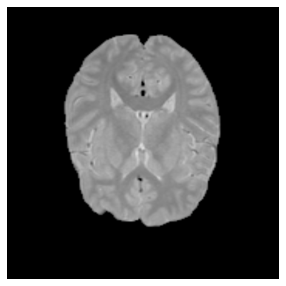

In [89]:
x, = first(dls_test.test_dl([img]))

x_img = TensorImage(dls_test.train.decode((x,))[0][0])
x_img.show()

In [91]:
class_Z = 1

with HookGradient(target_layer) as hookg:
    with HookActivation(target_layer) as hook:
        output = learn1.model.eval()(x.cuda())
        act = hook.stored
    output[0, class_Z].backward()
    grad = hookg.stored
    p0, p1 = output.cpu().detach()[0]

In [92]:

w = grad[0].mean(dim=(1,2), keepdim=True)
gradcam_map = (w * act[0]).sum(0).detach().cpu()
     

In [93]:

def plot_gradcam(img, learn1, hooked_layer, size=512):
    
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(8.5, 3), dpi=150)

    x_img = TensorImage(dls_test.train.decode((x,))[0][0])
    
    
    for i, ax in zip([0, 2, 1], axes):

        if i == 0:
            x_img.show(ax=ax)
            ax.set_axis_off()
            continue

        with HookGradient(hooked_layer) as hookg:
            with HookActivation(hooked_layer) as hook:
                output = learn1.model.eval()(x.cuda())
                act = hook.stored
            output[0, i-1].backward()
            grad = hookg.stored
            p_high, p_low = output.cpu().detach()[0]

        w = grad[0].mean(dim=(1,2), keepdim=True)
        gradcam_map = (w * act[0]).sum(0).detach().cpu()

        # thresholding to account for ReLU
        gradcam_map = torch.clamp(gradcam_map, min=0) 

        x_img.show(ax=ax)
        ax.imshow(
            gradcam_map, alpha=0.6, extent=(0, size, size,0),
            interpolation='mitchell', cmap='hot'
        )
        ax.set_axis_off()
            
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.02)
    
    return (fig, axes, *(np.exp([p_low, p_high]) / np.exp([p_low, p_high]).sum()))

(<Figure size 1275x450 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f484e36c9d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f484e316790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f484e2c5ac0>], dtype=object),
 0.61314946,
 0.3868505)

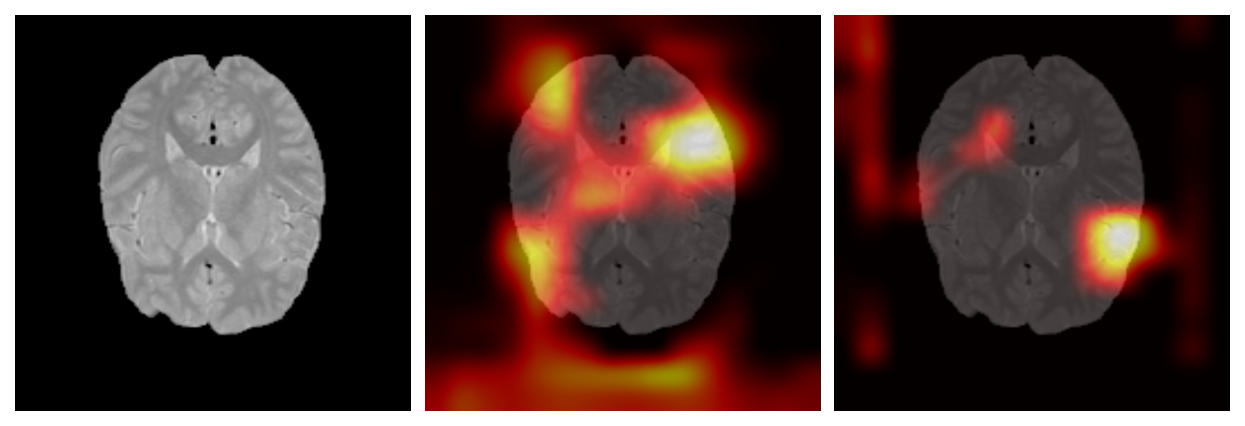

In [94]:

plot_gradcam(x_img,learn1,target_layer)
     

In [95]:
dls_test.valid_ds.items[18]


Path('/content/gdrive/MyDrive/3_cls/test/PD/PD_320.png')

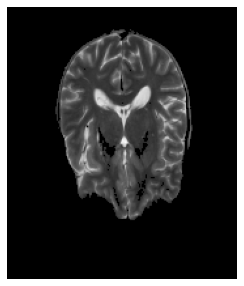

In [96]:
img = PILImage.create('/content/gdrive/MyDrive/3_cls/test/PD/PD_320.png')
img.show()

In [97]:

learn1.predict(img)
     

('PD', TensorBase(1), TensorBase([0.1472, 0.8528]))

In [98]:
class HookActivation():
    def __init__(self, target_layer):
        """Initialize a Pytorch hook using `hook_activation` function."""

        self.hook = target_layer.register_forward_hook(self.hook_activation) 
        
    def hook_activation(self, target_layer, activ_in, activ_out): 
        """Create a copy of the layer output activations and save 
        in `self.stored`.
        """
        self.stored = activ_out.detach().clone()
        
    def __enter__(self, *args): 
        return self
    
    def __exit__(self, *args): 
        self.hook.remove()

        
class HookGradient():
    def __init__(self, target_layer):
        """Initialize a Pytorch hook using `hook_gradient` function."""
        
        self.hook = target_layer.register_backward_hook(self.hook_gradient)   
        
    def hook_gradient(self, target_layer, gradient_in, gradient_out): 
        """Create a copy of the layer output gradients and save 
        in `self.stored`.
        """
        self.stored = gradient_out[0].detach().clone()
        
    def __enter__(self, *args): 
        return self

    def __exit__(self, *args): 
        self.hook.remove()

In [99]:
m = learn1.model.eval();
m;
     

In [100]:
target_layer = learn1.model[0][7]

target_layer;

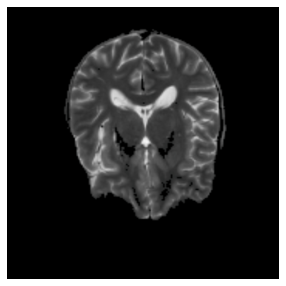

In [101]:
x, = first(dls_test.test_dl([img]))

x_img = TensorImage(dls_test.train.decode((x,))[0][0])
x_img.show()

In [102]:

class_Z = 1

with HookGradient(target_layer) as hookg:
    with HookActivation(target_layer) as hook:
        output = learn1.model.eval()(x.cuda())
        act = hook.stored
    output[0, class_Z].backward()
    grad = hookg.stored
    p0, p1 = output.cpu().detach()[0]
     

In [103]:

w = grad[0].mean(dim=(1,2), keepdim=True)
gradcam_map = (w * act[0]).sum(0).detach().cpu()
     

In [104]:
def plot_gradcam(img, learn1, hooked_layer, size=512):
    
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(8.5, 3), dpi=150)

    x_img = TensorImage(dls_test.train.decode((x,))[0][0])
    
    
    for i, ax in zip([0, 2, 1], axes):

        if i == 0:
            x_img.show(ax=ax)
            ax.set_axis_off()
            continue

        with HookGradient(hooked_layer) as hookg:
            with HookActivation(hooked_layer) as hook:
                output = learn1.model.eval()(x.cuda())
                act = hook.stored
            output[0, i-1].backward()
            grad = hookg.stored
            p_high, p_low = output.cpu().detach()[0]

        w = grad[0].mean(dim=(1,2), keepdim=True)
        gradcam_map = (w * act[0]).sum(0).detach().cpu()

        # thresholding to account for ReLU
        gradcam_map = torch.clamp(gradcam_map, min=0) 

        x_img.show(ax=ax)
        ax.imshow(
            gradcam_map, alpha=0.6, extent=(0, size, size,0),
            interpolation='mitchell', cmap='hot'
        )
        ax.set_axis_off()
            
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.02)
    
    return (fig, axes, *(np.exp([p_low, p_high]) / np.exp([p_low, p_high]).sum()))
     

(<Figure size 1275x450 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f48ebd80a60>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f48e0526760>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f48ea0457f0>], dtype=object),
 0.852774,
 0.14722595)

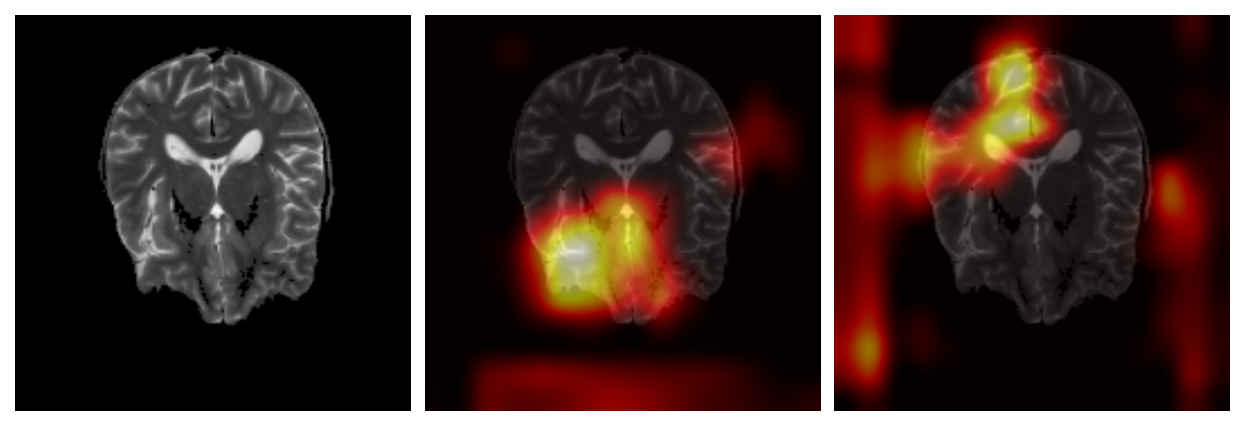

In [105]:

plot_gradcam(x_img,learn1,target_layer)

In [106]:
dls_test.valid_ds.items[22]


Path('/content/gdrive/MyDrive/3_cls/test/PD/PD_308.png')

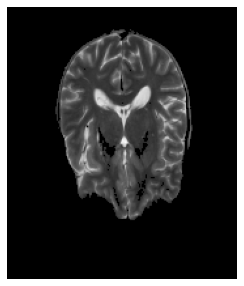

In [107]:
img2 = PILImage.create('/content/gdrive/MyDrive/3_cls/test/PD/PD_308.png')
img.show()


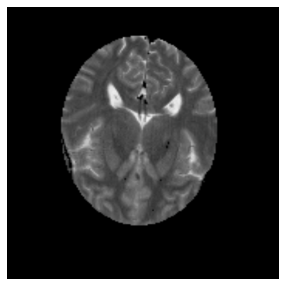

In [108]:

x, = first(dls_test.test_dl([img2]))

x_img2 = TensorImage(dls_test.train.decode((x,))[0][0])
x_img2.show()
     

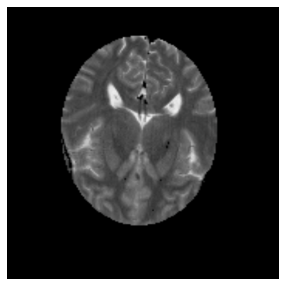

In [109]:

x, = first(dls_test.test_dl([img2]))

x_img2 = TensorImage(dls_test.train.decode((x,))[0][0])
x_img2.show()
     

In [110]:
class_Z = 0

with HookGradient(target_layer) as hookg:
    with HookActivation(target_layer) as hook:
        output = learn1.model.eval()(x.cuda())
        act = hook.stored
    output[0, class_Z].backward()
    grad = hookg.stored
    p0, p1 = output.cpu().detach()[0]

w = grad[0].mean(dim=(1,2), keepdim=True)
gradcam_map = (w * act[0]).sum(0).detach().cpu()
def plot_gradcam(img, learn1, hooked_layer, size=512):
    
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(8.5, 3), dpi=150)

    x_img = TensorImage(dls_test.train.decode((x,))[0][0])
    
    
    for i, ax in zip([0, 2, 1], axes):

        if i == 0:
            x_img.show(ax=ax)
            ax.set_axis_off()
            continue

        with HookGradient(hooked_layer) as hookg:
            with HookActivation(hooked_layer) as hook:
                output = learn1.model.eval()(x.cuda())
                act = hook.stored
            output[0, i-1].backward()
            grad = hookg.stored
            p_high, p_low = output.cpu().detach()[0]

        w = grad[0].mean(dim=(1,2), keepdim=True)
        gradcam_map = (w * act[0]).sum(0).detach().cpu()

        # thresholding to account for ReLU
        gradcam_map = torch.clamp(gradcam_map, min=0) 

        x_img.show(ax=ax)
        ax.imshow(
            gradcam_map, alpha=0.6, extent=(0, size, size,0),
            interpolation='mitchell', cmap='hot'
        )
        ax.set_axis_off()
            
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.02)
    
    return (fig, axes, *(np.exp([p_low, p_high]) / np.exp([p_low, p_high]).sum()))

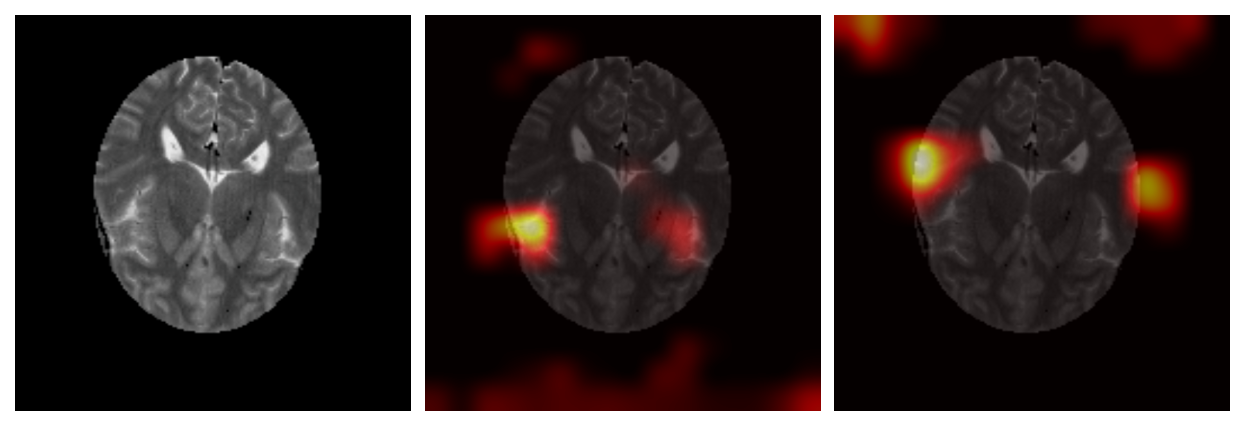

In [111]:

plot_gradcam(x_img2,learn1,target_layer);

In [112]:
dls_test.valid_ds.items[571]

Path('/content/gdrive/MyDrive/3_cls/test/CONTROL/CONTROLAD_3131.png')

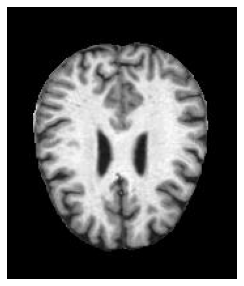

In [113]:

img = PILImage.create('/content/gdrive/MyDrive/3_cls/test/CONTROL/CONTROLAD_3131.png')
img.show()

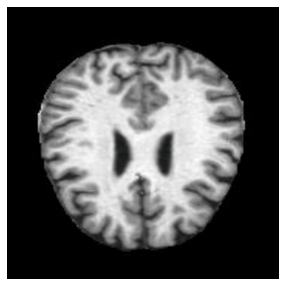

In [114]:

x, = first(dls_test.test_dl([img]))

x_img = TensorImage(dls_test.train.decode((x,))[0][0])
x_img.show()

In [115]:

learn1.predict(img)

('CONTROL', TensorBase(0), TensorBase([0.9987, 0.0013]))

In [116]:
class_Z = 1

with HookGradient(target_layer) as hookg:
    with HookActivation(target_layer) as hook:
        output = learn1.model.eval()(x.cuda())
        act = hook.stored
    output[0, class_Z].backward()
    grad = hookg.stored
    p0, p1 = output.cpu().detach()[0]

In [117]:

w = grad[0].mean(dim=(1,2), keepdim=True)
gradcam_map = (w * act[0]).sum(0).detach().cpu()
     

In [118]:

def plot_gradcam(img, learn1, hooked_layer, size=512):
    
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(8.5, 3), dpi=150)

    x_img = TensorImage(dls_test.train.decode((x,))[0][0])
    
    
    for i, ax in zip([0, 2, 1], axes):

        if i == 0:
            x_img.show(ax=ax)
            ax.set_axis_off()
            continue

        with HookGradient(hooked_layer) as hookg:
            with HookActivation(hooked_layer) as hook:
                output = learn1.model.eval()(x.cuda())
                act = hook.stored
            output[0, i-1].backward()
            grad = hookg.stored
            p_high, p_low = output.cpu().detach()[0]

        w = grad[0].mean(dim=(1,2), keepdim=True)
        gradcam_map = (w * act[0]).sum(0).detach().cpu()

        # thresholding to account for ReLU
        gradcam_map = torch.clamp(gradcam_map, min=0) 

        x_img.show(ax=ax)
        ax.imshow(
            gradcam_map, alpha=0.6, extent=(0, size, size,0),
            interpolation='mitchell', cmap='hot'
        )
        ax.set_axis_off()
            
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.02)
    
    return (fig, axes, *(np.exp([p_low, p_high]) / np.exp([p_low, p_high]).sum()))
     

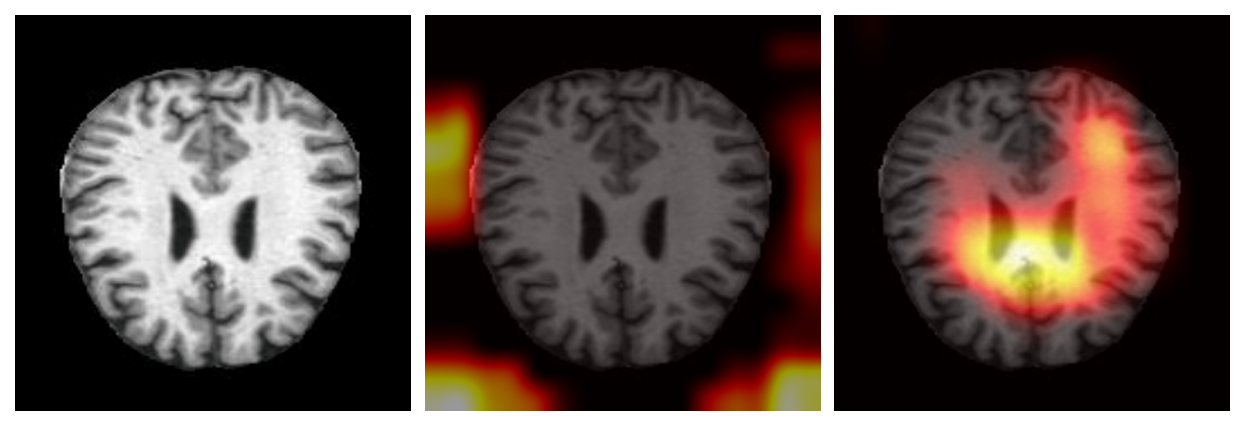

In [119]:

plot_gradcam(x_img,learn1,target_layer);